In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random
import gc

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from itertools import combinations

Using TensorFlow backend.


In [2]:
classes = ["elliptical", "spiral"]
img_channels = list("ugriz")

img_data_file = "/Users/deepak/data/img_data.npy"
labels_file = "/Users/deepak/data/labels.npy"

def load_images():
    img_data = []
    labels = []
    for aClass in classes:
        files = glob.glob("/Users/deepak/Downloads/final_data/"+aClass+"/*.npz")
        for file_name in files:
            img = np.load(file_name)
            img = np.array(list(map(lambda channel: img[channel], img_channels)))
            img_data.append(img)
            labels.append(classes.index(aClass))
    return img_data, labels

if img_data_file not in glob.glob(img_data_file):
    img_data, labels = load_images()
    img_data = np.array(img_data)
    labels = np.array(labels)
    
    #shuffle the data
    shuffle = np.arange(img_data.shape[0])
    np.random.shuffle(shuffle)
    img_data = img_data[shuffle]
    labels = labels[shuffle]
    del shuffle
    
    np.save(img_data_file, img_data)
    np.save(labels_file, labels)
else:
    img_data = np.load(img_data_file)
    labels = np.load(labels_file)
    
img_data = np.transpose(img_data, (0, 2, 3, 1))
gc.collect()
img_data = img_data/np.amax(img_data)
gc.collect()

0

Galaxy type: elliptical


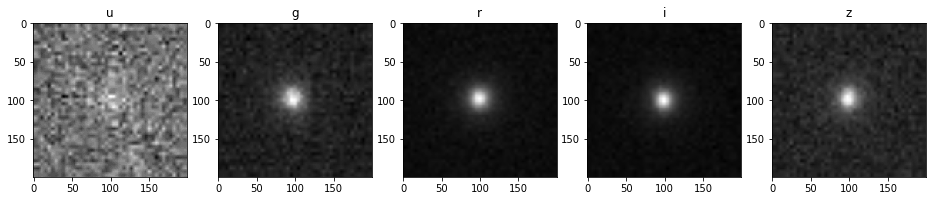

In [3]:
fig=plt.figure(figsize=(16, 16))
columns = len(img_channels)
rows = 1
print(f"Galaxy type: {classes[labels[0]]}")
for i in range(0, len(img_channels)):
    img = img_data[0]
    fig.add_subplot(rows, columns, i+1)
    plt.title(img_channels[i])
    #using gray because I'm not sure how a single channel that is not even part of RGB should be displayed
    plt.imshow(img[:,:,i], cmap="gray")
plt.show()

In [4]:
def CNN(img_channels, img_rows, img_cols, verbose=False):
    # some hyperparamters you can chage
    dropoutpar = 0.5
    nb_dense = 64

    model = Sequential()
    model.add(Conv2D(128, (3, 3), border_mode='same',
                            input_shape=(img_rows, img_cols, img_channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(256, (3, 3), border_mode='same'))
#     model.add(Activation('relu'))

#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), border_mode='same'))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(nb_dense, activation='relu'))
    model.add(Dropout(dropoutpar))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    print("Compilation...")

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    print("... done!")
    if verbose is True:
        print("Model Summary")
        print("===================")
        model.summary()
    return model

In [5]:
model = CNN(img_data.shape[3], img_data.shape[1], img_data.shape[2], verbose = True)
metrics = model.fit(img_data, labels, batch_size=16, validation_split=0.3, epochs=30)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(200, 200,..., padding="same")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to

Compilation...
... done!
Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     5888      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     295168    
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 256)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1

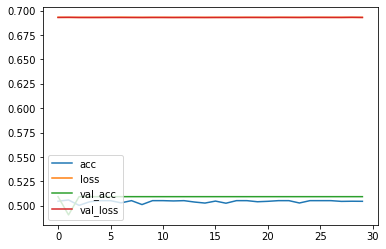

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 128)     5888      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     295168    
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 256)     0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100, 256)     0         
__________

In [6]:
plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 26681 samples, validate on 11436 samples
Epoch 1/30
26681/26681 [==============================] - 622s 23ms/step - loss: 0.4749 - acc: 0.7670 - val_loss: 0.3529 - val_acc: 0.8469
Epoch 2/30
26681/26681 [==============================] - 594s 22ms/step - loss: 0.3093 - acc: 0.8716 - val_loss: 0.2751 - val_acc: 0.8842
Epoch 3/30
26681/26681 [==============================] - 595s 22ms/step - loss: 0.2529 - acc: 0.8991 - val_loss: 0.2399 - val_acc: 0.9015
Epoch 4/30
26681/26681 [==============================] - 599s 22ms/step - loss: 0.2362 - acc: 0.9076 - val_loss: 0.2332 - val_acc: 0.9135
Epoch 5/30
26681/26681 [==============================] - 600s 22ms/step - loss: 0.2198 - acc: 0.9148 - val_loss: 0.2192 - val_acc: 0.9203
Epoch 6/30
26681/26681 [==============================] - 599s 22ms/step - loss: 0.2061 - acc: 0.9212 - val_loss: 0.2022 - val_acc: 0.9273
Epoch 7/30
26681/26681 [==============================] - 604s 23ms/step - loss: 0.1947 - acc: 0.9267 - val_loss: 0.

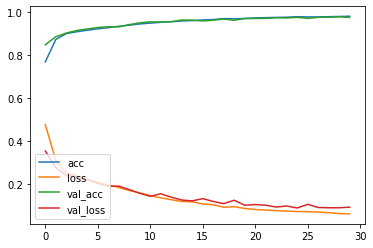

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 67712)             0         
__________

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 26681 samples, validate on 11436 samples
Epoch 1/30
26681/26681 [==============================] - 727s 27ms/step - loss: 0.4603 - acc: 0.7816 - val_loss: 0.3576 - val_acc: 0.8378
Epoch 2/30
26681/26681 [==============================] - 606s 23ms/step - loss: 0.3150 - acc: 0.8687 - val_loss: 0.2666 - val_acc: 0.8915
Epoch 3/30
26681/26681 [==============================] - 625s 23ms/step - loss: 0.2638 - acc: 0.8954 - val_loss: 0.2390 - val_acc: 0.9096
Epoch 4/30
26681/26681 [==============================] - 623s 23ms/step - loss: 0.2363 - acc: 0.9098 - val_loss: 0.2564 - val_acc: 0.8923
Epoch 5/30
26681/26681 [==============================] - 610s 23ms/step - loss: 0.2124 - acc: 0.9210 - val_loss: 0.1858 - val_acc: 0.9322
Epoch 6/30
26681/26681 [==============================] - 623s 23ms/step - loss: 0.1941 - acc: 0.9274 - val_loss: 0.1808 - val_acc: 0.9358
Epoch 7/30
26681/26681 [==============================] - 628s 24ms/step - loss: 0.1843 - acc: 0.9323 - val_loss: 0.

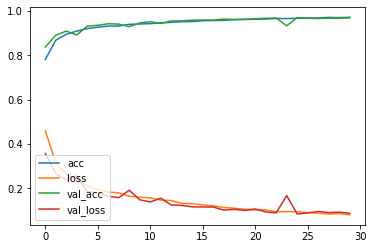

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)        73792     
__________

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 26681 samples, validate on 11436 samples
Epoch 1/30
26681/26681 [==============================] - 748s 28ms/step - loss: 0.4593 - acc: 0.7738 - val_loss: 0.3260 - val_acc: 0.8651
Epoch 2/30
26681/26681 [==============================] - 601s 23ms/step - loss: 0.2958 - acc: 0.8776 - val_loss: 0.2837 - val_acc: 0.8906
Epoch 3/30
26681/26681 [==============================] - 598s 22ms/step - loss: 0.2581 - acc: 0.8956 - val_loss: 0.2359 - val_acc: 0.9056
Epoch 4/30
26681/26681 [==============================] - 594s 22ms/step - loss: 0.2381 - acc: 0.9059 - val_loss: 0.2090 - val_acc: 0.9217
Epoch 5/30
26681/26681 [==============================] - 596s 22ms/step - loss: 0.2070 - acc: 0.9209 - val_loss: 0.2690 - val_acc: 0.8966
Epoch 6/30
26681/26681 [==============================] - 601s 23ms/step - loss: 0.1861 - acc: 0.9302 - val_loss: 0.1745 - val_acc: 0.9351
Epoch 7/30
26681/26681 [==============================] - 624s 23ms/step - loss: 0.1713 - acc: 0.9370 - val_loss: 0.

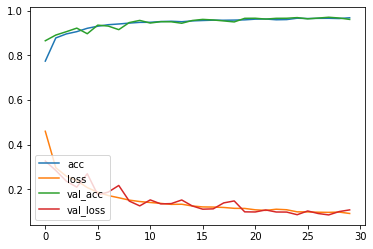

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
__________

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

Train on 26681 samples, validate on 11436 samples
Epoch 1/30
26681/26681 [==============================] - 761s 29ms/step - loss: 0.4788 - acc: 0.7636 - val_loss: 0.4086 - val_acc: 0.8261
Epoch 2/30
26681/26681 [==============================] - 614s 23ms/step - loss: 0.3087 - acc: 0.8720 - val_loss: 0.2370 - val_acc: 0.9053
Epoch 3/30
26681/26681 [==============================] - 603s 23ms/step - loss: 0.2433 - acc: 0.9058 - val_loss: 0.2137 - val_acc: 0.9227
Epoch 4/30
26681/26681 [==============================] - 600s 23ms/step - loss: 0.2038 - acc: 0.9236 - val_loss: 0.1723 - val_acc: 0.9359
Epoch 5/30
26681/26681 [==============================] - 602s 23ms/step - loss: 0.1675 - acc: 0.9368 - val_loss: 0.1495 - val_acc: 0.9479
Epoch 6/30
26681/26681 [==============================] - 615s 23ms/step - loss: 0.1471 - acc: 0.9454 - val_loss: 0.1685 - val_acc: 0.9375
Epoch 7/30
26681/26681 [==============================] - 612s 23ms/step - loss: 0.1295 - acc: 0.9544 - val_loss: 0.

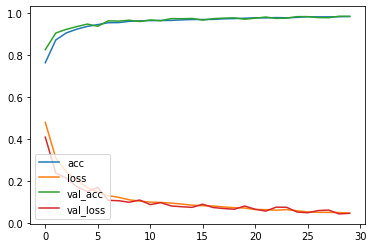

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 128)       0         
__________

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(img_data.shape[1], img_data.shape[2], img_data.shape[3]), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

metrics = model.fit(img_data, labels, batch_size=32, validation_split=0.3, epochs=30)

plt.plot(metrics.history["acc"])
plt.plot(metrics.history["loss"])
plt.plot(metrics.history["val_acc"])
plt.plot(metrics.history["val_loss"])
plt.legend(["acc", "loss", "val_acc", "val_loss"], loc=3)
plt.show()

model.summary()

In [5]:
model.save("model.h5")